# Statistics using Scikit-image

We can use scikit-image for extracting features from label images. For convenience reasons we use the [napari-skimage-regionprops](https://github.com/haesleinhuepf/napari-skimage-regionprops) library. 

Before we can do measurements, we need an `image` and a corresponding `label_image`. Therefore, we recapitulate filtering, thresholding and labeling:

In [10]:
from skimage.io import imread
from skimage import filters
from skimage import measure
from napari_skimage_regionprops import regionprops_table
from pyclesperanto_prototype import imshow
import pandas as pd 
import numpy as np
import pyclesperanto_prototype as cle

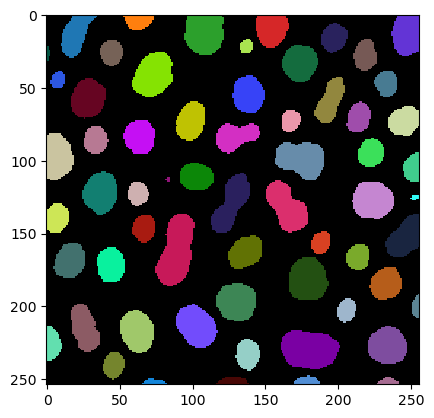

In [2]:
# load image
image = imread("../../data/blobs.tif")

# denoising
blurred_image = filters.gaussian(image, sigma=1)

# binarization
threshold = filters.threshold_otsu(blurred_image)
thresholded_image = blurred_image >= threshold

# labeling
label_image = measure.label(thresholded_image)

# visualization
imshow(label_image, labels=True)

## Measurements / region properties

We are now using the very handy function `regionprops_table`. It provides features based on the scikit-image [regionprops list of measurements](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops) library. Let us check first what we need to provide for this function:

In [3]:
regionprops_table?

Signature:
regionprops_table(
    image: 'napari.types.ImageData',
    labels: 'napari.types.LabelsData',
    size: bool = True,
    intensity: bool = True,
    perimeter: bool = False,
    shape: bool = False,
    position: bool = False,
    moments: bool = False,
    napari_viewer: 'napari.Viewer' = None,
) -> 'pandas.DataFrame'
Docstring: Adds a table widget to a given napari viewer with quantitative analysis results derived from an image-label pair.
File:      c:\users\maral\mambaforge\envs\feature_blogpost\lib\site-packages\napari_skimage_regionprops\_regionprops.py
Type:      function

We see that we need to provide which feature categories we want to measure. One way of dividing these categories is shown here:

![](schematics/feature_categories.png)

Feature categories which are set to `True` are measured by default. In this case, the categories are `size` and `intensity`. But `perimeter` and `shape` would be also interesting to investigate. So we need to set them to `True` as well. 

In [4]:
df = pd.DataFrame(regionprops_table(image , label_image, 
                                           perimeter = True, 
                                           shape = True, 
                                           position=True,
                                           moments=True))
df

,label,area,bbox_area,equivalent_diameter,convex_area,max_intensity,mean_intensity,min_intensity,perimeter,perimeter_crofton,...,moments_hu-1,moments_hu-2,moments_hu-3,moments_hu-4,moments_hu-5,moments_hu-6,standard_deviation_intensity,aspect_ratio,roundness,circularity
0,1,429,750,23.371345,479,232.0,191.440559,128.0,89.012193,87.070368,...,0.018445,0.000847,1.133411e-04,1.205336e-08,-2.714451e-06,3.298765e-08,29.793138,2.088249,0.451572,0.680406
1,2,183,231,15.264430,190,224.0,179.846995,128.0,53.556349,53.456120,...,0.010549,0.001177,6.734903e-05,-1.483503e-08,-5.401836e-06,-1.180484e-08,21.270534,1.782168,0.530849,0.801750
2,3,658,756,28.944630,673,248.0,205.604863,120.0,95.698485,93.409370,...,0.000113,0.000104,1.146642e-06,4.801450e-13,9.889775e-09,-1.248247e-11,29.392255,1.067734,0.918683,0.902871
3,4,433,529,23.480049,445,248.0,217.515012,120.0,77.455844,76.114262,...,0.000096,0.000348,3.349309e-07,-3.612652e-12,2.526209e-09,-9.198337e-14,35.852345,1.061942,0.917813,0.906963
4,5,472,551,24.514670,486,248.0,213.033898,128.0,83.798990,82.127941,...,0.005876,0.000072,4.356690e-06,-6.223212e-11,-3.178823e-07,4.522442e-11,28.741080,1.579415,0.621952,0.844645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,213,285,16.468152,221,224.0,184.525822,120.0,52.284271,52.250114,...,0.001745,0.000002,1.126452e-07,5.814575e-14,4.625041e-09,-6.410600e-15,28.255467,1.296143,0.771094,0.979146
58,59,79,108,10.029253,84,248.0,184.810127,128.0,39.313708,39.953250,...,0.056792,0.001777,1.725200e-04,-5.364882e-08,-2.906455e-05,-7.903632e-08,33.739912,3.173540,0.300766,0.642316
59,60,88,110,10.585135,92,216.0,182.727273,128.0,45.692388,46.196967,...,0.097966,0.002268,2.994111e-04,-1.724577e-08,-3.731912e-05,-2.461160e-07,24.417173,4.021193,0.238521,0.529669
60,61,52,75,8.136858,56,248.0,189.538462,128.0,30.692388,32.924135,...,0.046813,0.003694,3.041106e-04,-2.539652e-07,-5.698262e-05,-1.984555e-07,37.867411,2.839825,0.322190,0.693668


As you can see, we have now plenty of features to investigate. We can print out all feature names with the `keys` function:

In [5]:
print(df.keys())

Index(['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area',
       'max_intensity', 'mean_intensity', 'min_intensity', 'perimeter',
       'perimeter_crofton', 'extent', 'local_centroid-0', 'local_centroid-1',
       'solidity', 'feret_diameter_max', 'major_axis_length',
       'minor_axis_length', 'orientation', 'eccentricity', 'centroid-0',
       'centroid-1', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3',
       'weighted_centroid-0', 'weighted_centroid-1', 'moments-0-0',
       'moments-0-1', 'moments-0-2', 'moments-0-3', 'moments-1-0',
       'moments-1-1', 'moments-1-2', 'moments-1-3', 'moments-2-0',
       'moments-2-1', 'moments-2-2', 'moments-2-3', 'moments-3-0',
       'moments-3-1', 'moments-3-2', 'moments-3-3', 'moments_normalized-0-0',
       'moments_normalized-0-1', 'moments_normalized-0-2',
       'moments_normalized-0-3', 'moments_normalized-1-0',
       'moments_normalized-1-1', 'moments_normalized-1-2',
       'moments_normalized-1-3', 'moments_normalized-2-

And `describe` gives us basic statistics like `max`, `mean`, `min` and `std` of each feature:

In [6]:
df.describe()

,label,area,bbox_area,equivalent_diameter,convex_area,max_intensity,mean_intensity,min_intensity,perimeter,perimeter_crofton,...,moments_hu-1,moments_hu-2,moments_hu-3,moments_hu-4,moments_hu-5,moments_hu-6,standard_deviation_intensity,aspect_ratio,roundness,circularity
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,62.000000,62.000000,62.000000,62.000000
mean,31.500000,355.370968,475.677419,20.074583,372.790323,233.548387,190.429888,125.161290,67.787235,67.071263,...,0.012854,5.166382e-04,7.053581e-05,5.855846e-08,3.633047e-06,-8.703715e-09,28.689171,1.637991,0.692418,0.894101
std,18.041619,211.367385,300.328169,7.091876,223.801078,19.371838,15.382559,4.602898,25.008581,23.507575,...,0.027066,1.077748e-03,2.093454e-04,3.687535e-07,3.998053e-05,2.897240e-07,6.127700,0.794366,0.210973,0.183024
min,1.000000,7.000000,9.000000,2.985411,7.000000,152.000000,146.285714,112.000000,6.828427,9.155272,...,0.000056,2.514436e-07,6.992073e-09,-2.539652e-07,-5.698262e-05,-1.757113e-06,5.598834,1.048053,0.213334,0.529669
25%,16.250000,194.750000,260.000000,15.745692,204.750000,232.000000,182.969505,120.000000,52.602291,52.551616,...,0.000627,3.032838e-05,1.242304e-07,-1.881559e-13,-1.039790e-08,-7.811552e-13,26.514258,1.168451,0.538616,0.805774
50%,31.500000,366.000000,448.500000,21.585875,376.500000,240.000000,190.749492,128.000000,69.112698,68.204464,...,0.001971,6.198102e-05,5.957846e-07,6.176303e-14,5.408146e-10,-9.288753e-15,29.017801,1.316003,0.757485,0.925560
75%,46.750000,500.750000,685.500000,25.250050,516.500000,248.000000,199.725305,128.000000,86.097980,84.307520,...,0.010151,3.475818e-04,3.799021e-05,1.135209e-11,1.484276e-08,1.902152e-12,32.534123,1.769976,0.851463,0.966037
max,62.000000,896.000000,1350.000000,33.776066,977.000000,248.000000,220.026144,136.000000,129.982756,125.912897,...,0.125246,5.440067e-03,1.300612e-03,2.775191e-06,3.027878e-04,1.321910e-06,38.323999,4.417297,0.974824,1.886542


## Exercises

Make a table with only `solidity`, `circularity` and `roundness`.